<a href="https://colab.research.google.com/github/LucasEPrz/APRENDIZAJE-POR-REFUERZO/blob/main/Lab1/Lab1_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Introducción al aprendizaje por refuerzos

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2023

## Actividades

1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

4. (Opcional) Implementar política de exploración Softmax, en donde cada acción tiene una probabilidad $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{\widetilde{a} \in A}e^{Q(s,\widetilde{a})/\tau}}$$

5. (Opcional) Implementar Dyna-Q a partir del algoritmo Q-Learning, incorporando una actualización mediante un modelo. Comentar cómo se desempeña respecto a los demás algoritmos.


Para dejar el lab listo para su corrección, dejar link a repo de Github con un notebook ejecutando el agente en la planilla enviada en Slack.

## **1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".**



In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np

In [ ]:
# Se crea el entorno
env = gym.make("CliffWalking-v0")

# Se establece los parámetros para que se pueda ejecutar bien al agente
hyperparameters = {
    "alpha": 0.5,   # Tasa de aprendizaje
    "gamma": 1,     # Factor de descuento
    "epsilon": 0.1, # Probabilidad de exploración (política epsilon-greedy)
    "tau": 25,      # Parámetro de temperatura para softmax (si lo usamos)
}

# Se crea un diccionario de valores de Q (estado, acción)
q = {}

# Esto son lo número de episodios a ejecutar
episodes_to_run = 500


In [ ]:
def choose_action_e_greedy(state: int, actions: range, q: dict, hyperparameters: dict, random_state: np.random.RandomState) -> int:
    q_values = [q.get((state, a), 0.0) for a in actions]  # Valor de Q para cada acción posible
    max_q = max(q_values)  # El valor máximo de Q

    if random_state.uniform() < hyperparameters["epsilon"]:  # Exploración
        return random_state.choice(actions)  # Acción aleatoria
    else:  # Explotación
        count = q_values.count(max_q)  # Se establece un maximo de acciones con valor máximo
        if count > 1:
            best = [i for i in range(len(actions)) if q_values[i] == max_q]
            return random_state.choice(best)  # Se elegira aleatoriamente entre las mejores
        else:
            return q_values.index(max_q)  # Se elegirá la mejor acción


In [ ]:
def learn_SARSA(state: int, action: int, reward: float, next_state: int, next_action: int, q: dict, hyperparameters: dict) -> None:
    alpha = hyperparameters["alpha"]
    gamma = hyperparameters["gamma"]

    # Actualización SARSA
    q[(state, action)] = q.get((state, action), 0.0) + alpha * (reward + gamma * q.get((next_state, next_action), 0.0) - q.get((state, action), 0.0))


# Función para ejecutar el entrenamiento del agente
Este es el ciclo principal donde el agente interactúa con el entorno durante los episodios. En cada episodio, el agente elige acciones, realiza transiciones y actualiza los valores de Q usando SARSA.

In [ ]:
def run_SARSA(env, hyperparameters, episodes_to_run, q, random_state):
    timesteps_of_episode = []
    reward_of_episode = []

    actions = range(env.action_space.n)  # Definir las acciones posibles

    for episode in range(episodes_to_run):
        state, _ = env.reset()  # Inicializar el entorno y obtener el estado inicial
        done = False
        episode_reward = 0
        t = 0

        # Se elegirá la primera acción según la política epsilon-greedy
        action = choose_action_e_greedy(state, actions, q, hyperparameters, random_state)

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)  # Ejecutar la acción
            next_action = choose_action_e_greedy(next_state, actions, q, hyperparameters, random_state)  # Elegir la siguiente acción

            # Actualizar Q utilizando SARSA
            learn_SARSA(state, action, reward, next_state, next_action, q, hyperparameters)

            episode_reward += reward

            if terminated or truncated:  # Fin del episodio
                done = True

            state = next_state  # Avanzar al siguiente estado
            action = next_action  # Actualizar la acción

            t += 1

        timesteps_of_episode.append(t)
        reward_of_episode.append(episode_reward)

    return timesteps_of_episode, reward_of_episode

# Momento de ejecutar el agente en "The Cliff"

In [ ]:
# Se inicializam el generador de números aleatorios
random_state = np.random.RandomState(42)

# Se ejecuta el agente SARSA
timesteps, rewards = run_SARSA(env, hyperparameters, episodes_to_run, q, random_state)

# Mostrar los resultados
print(f"Promedio de pasos por episodio: {np.mean(timesteps)}")
print(f"Promedio de recompensa por episodio: {np.mean(rewards)}")


Promedio de pasos por episodio: 24.892
Promedio de recompensa por episodio: -33.208


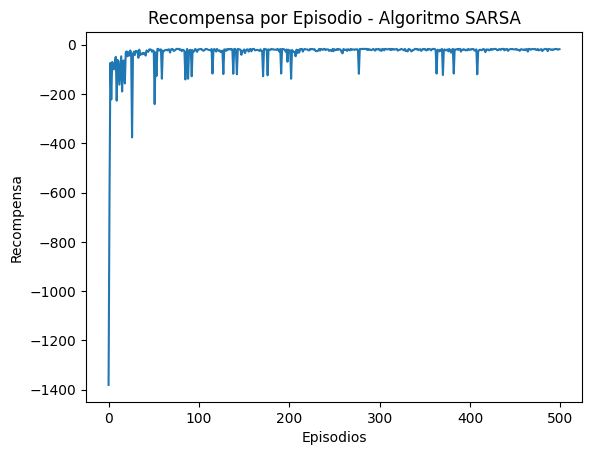

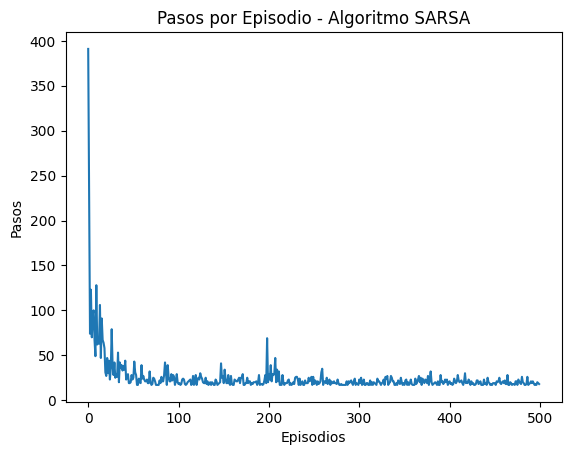

In [ ]:
import matplotlib.pyplot as plt

# Graficar recompensa por episodio
plt.plot(rewards)
plt.xlabel('Episodios')
plt.ylabel('Recompensa')
plt.title('Recompensa por Episodio - Algoritmo SARSA')
plt.show()

# Graficar pasos por episodio
plt.plot(timesteps)
plt.xlabel('Episodios')
plt.ylabel('Pasos')
plt.title('Pasos por Episodio - Algoritmo SARSA')
plt.show()


La curva de recompensa mejora gradualmente a lo largo de los episodios, lo que indica que SARSA aprende a evitar el acantilado y se estabiliza en una estrategia segura.

Los pasos por episodio disminuyen rápidamente, mostrando que SARSA aprende a llegar al objetivo de forma más eficiente, aunque mantiene cierta variabilidad.

# **2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.**


In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Se crea el entorno
env = gym.make("CliffWalking-v0")

# Se establecen los parámetros del agente
hyperparameters = {
    "alpha": 0.5,   # Tasa de aprendizaje
    "gamma": 1,     # Factor de descuento
    "epsilon": 0.1, # Probabilidad de exploración (política epsilon-greedy)
}

# Diccionario de valores de Q (estado, acción)
q = {}

# Número de episodios a ejecutar
episodes_to_run = 500

Función de selección de acción (política epsilon-greedy)

In [ ]:
def choose_action_e_greedy(state: int, actions: range, q: dict, hyperparameters: dict, random_state: np.random.RandomState) -> int:
    q_values = [q.get((state, a), 0.0) for a in actions]  # Valor de Q para cada acción posible
    max_q = max(q_values)  # El valor máximo de Q

    if random_state.uniform() < hyperparameters["epsilon"]:  # Exploración
        return random_state.choice(actions)  # Acción aleatoria
    else:  # Explotación
        count = q_values.count(max_q)
        if count > 1:
            best = [i for i in range(len(actions)) if q_values[i] == max_q]
            return random_state.choice(best)  # Elegir aleatoriamente entre las mejores
        else:
            return q_values.index(max_q)  # Elegir la mejor acción


# Función de actualización Q-Learning

In [ ]:
def learn_Q_learning(state: int, action: int, reward: float, next_state: int, q: dict, hyperparameters: dict) -> None:
    alpha = hyperparameters["alpha"]
    gamma = hyperparameters["gamma"]

    # Actualización Q-Learning
    max_q_next = max([q.get((next_state, a), 0.0) for a in range(env.action_space.n)])
    q[(state, action)] = q.get((state, action), 0.0) + alpha * (reward + gamma * max_q_next - q.get((state, action), 0.0))

# Se ejecutará el entrenamiento del agente Q-Learning

In [ ]:
def run_Q_learning(env, hyperparameters, episodes_to_run, q, random_state):
    timesteps_of_episode = []
    reward_of_episode = []

    actions = range(env.action_space.n)  # Se definen las acciones posibles

    for episode in range(episodes_to_run):
        state, _ = env.reset()  # Se inicializan el entorno y obtener el estado inicial
        done = False
        episode_reward = 0
        t = 0

        # Se elige la primera acción según la política epsilon-greedy
        action = choose_action_e_greedy(state, actions, q, hyperparameters, random_state)

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)  # Ejecutar la acción

            # Se actualiza utilizando Q-Learning
            learn_Q_learning(state, action, reward, next_state, q, hyperparameters)

            episode_reward += reward

            if terminated or truncated:  # Fin del episodio
                done = True

            state = next_state  # Se avanza al siguiente estado
            action = choose_action_e_greedy(state, actions, q, hyperparameters, random_state)  # Elegir nueva acción

            t += 1

        timesteps_of_episode.append(t)
        reward_of_episode.append(episode_reward)

    return timesteps_of_episode, reward_of_episode


# Ahora se ejecutara el agente en "The Cliff" y se observan los resultados

In [ ]:
# Se inicializa el generador de números aleatorios
random_state = np.random.RandomState(42)

# Se ejecuta el agente Q-Learning
timesteps, rewards = run_Q_learning(env, hyperparameters, episodes_to_run, q, random_state)

# Mostrar los resultados
print(f"Promedio de pasos por episodio: {np.mean(timesteps)}")
print(f"Promedio de recompensa por episodio: {np.mean(rewards)}")


Promedio de pasos por episodio: 20.562
Promedio de recompensa por episodio: -56.598


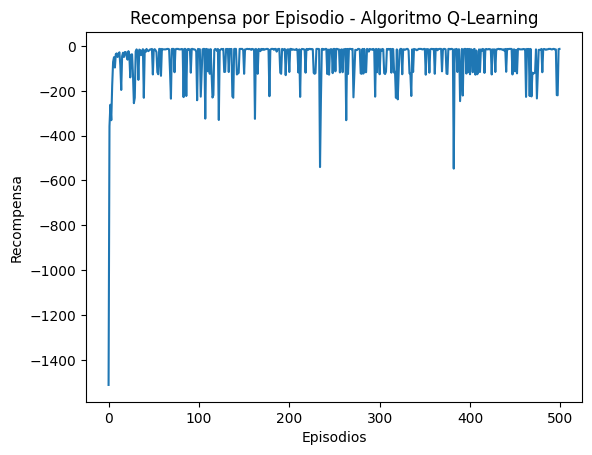

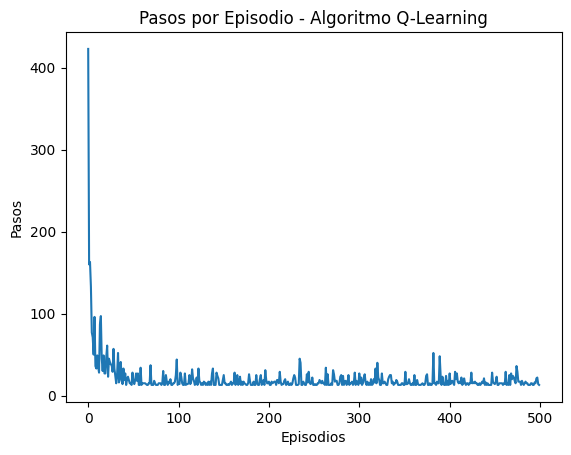

In [ ]:
# Graficar recompensa por episodio
plt.plot(rewards)
plt.xlabel('Episodios')
plt.ylabel('Recompensa')
plt.title('Recompensa por Episodio - Algoritmo Q-Learning')
plt.show()

# Graficar pasos por episodio
plt.plot(timesteps)
plt.xlabel('Episodios')
plt.ylabel('Pasos')
plt.title('Pasos por Episodio - Algoritmo Q-Learning')
plt.show()

La curva de recompensa tiene más oscilaciones y tarda más en estabilizarse, con caídas abruptas, lo que indica que el agente asume más riesgos y a menudo cae en el acantilado durante el entrenamiento.
Los pasos por episodio también disminuyen rápidamente, pero pueden ser menores porque Q-Learning tiende a buscar rutas más cortas, aunque más riesgosas.

#**3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$**.

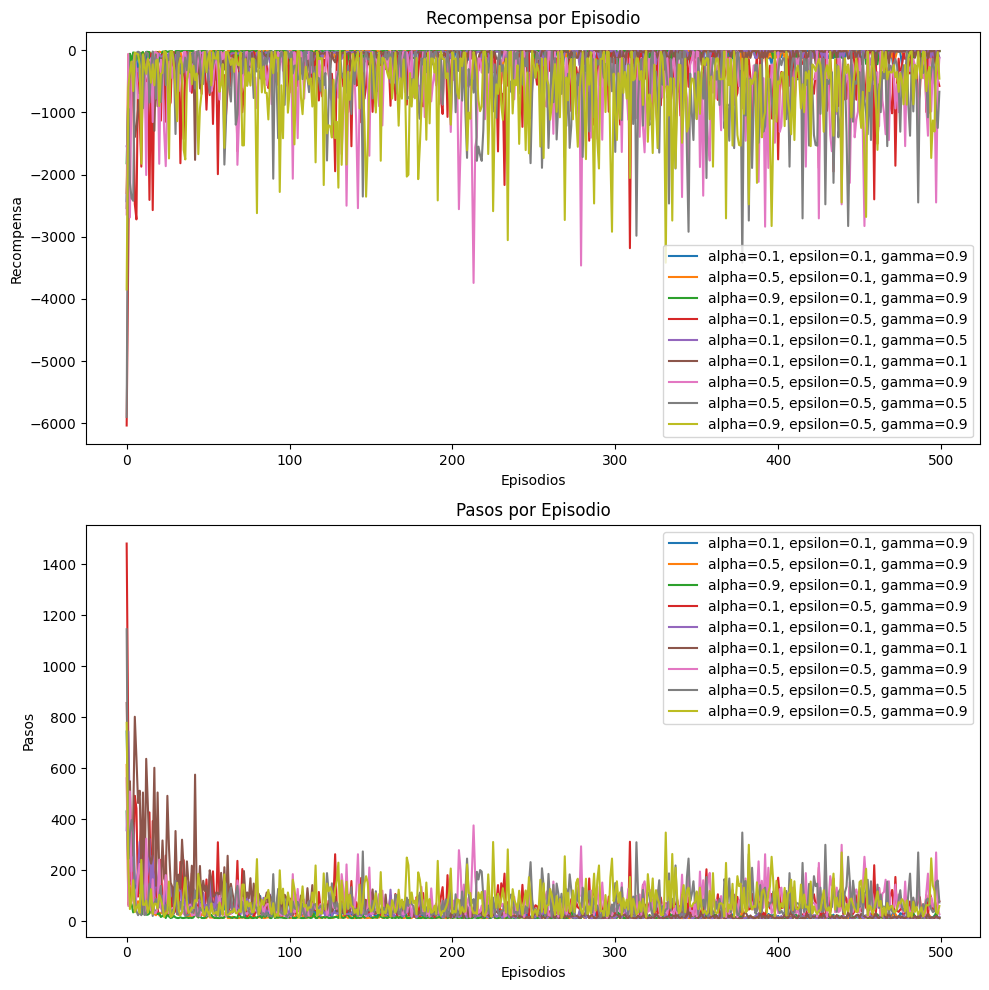

In [ ]:
# Se hacen algunas combinaciones de parámetros a probar
param_combinations = [
    {"alpha": 0.1, "epsilon": 0.1, "gamma": 0.9},
    {"alpha": 0.5, "epsilon": 0.1, "gamma": 0.9},
    {"alpha": 0.9, "epsilon": 0.1, "gamma": 0.9},
    {"alpha": 0.1, "epsilon": 0.5, "gamma": 0.9},
    {"alpha": 0.1, "epsilon": 0.1, "gamma": 0.5},
    {"alpha": 0.1, "epsilon": 0.1, "gamma": 0.1},
    {"alpha": 0.5, "epsilon": 0.5, "gamma": 0.9},
    {"alpha": 0.5, "epsilon": 0.5, "gamma": 0.5},
    {"alpha": 0.9, "epsilon": 0.5, "gamma": 0.9},
]

# Se ejecutan pruebas con diferentes combinaciones de parámetros
results = {}

for params in param_combinations:
    hyperparameters = {
        "alpha": params["alpha"],
        "gamma": params["gamma"],
        "epsilon": params["epsilon"],
    }

    # Se reinician el entorno y las variables antes de cada ejecución
    q = {}
    random_state = np.random.RandomState(42)

    # Se jecutan el agente
    timesteps, rewards = run_Q_learning(env, hyperparameters, episodes_to_run, q, random_state)

    # Se guardar los resultados
    results[f"alpha={params['alpha']}, epsilon={params['epsilon']}, gamma={params['gamma']}"] = {
        "timesteps": timesteps,
        "rewards": rewards,
    }

# Graficar resultados para comparación
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Graficar recompensa por episodio
for label, result in results.items():
    axs[0].plot(result["rewards"], label=label)
axs[0].set_title("Recompensa por Episodio")
axs[0].set_xlabel("Episodios")
axs[0].set_ylabel("Recompensa")
axs[0].legend()

# Graficar pasos por episodio
for label, result in results.items():
    axs[1].plot(result["timesteps"], label=label)
axs[1].set_title("Pasos por Episodio")
axs[1].set_xlabel("Episodios")
axs[1].set_ylabel("Pasos")
axs[1].legend()

plt.tight_layout()
plt.show()


# **Inferencias del trabajo**

Los híper-parámetros
𝛼
α,
𝜖
ϵ y
𝛾
γ tienen un gran impacto en la convergencia de los algoritmos de Q-Learning y SARSA. Ajustarlos adecuadamente es crucial para lograr un buen rendimiento del agente, y su efecto dependerá en gran medida del entorno y el tipo de problema que se esté resolviendo. Experimentar con diferentes combinaciones te ayudará a entender mejor cómo afectan al proceso de aprendizaje.

Recompensa por episodio:

SARSA obtiene recompensas menos negativas (-33.208 en promedio) que Q-Learning (-56.598). Esto ocurre porque SARSA sigue una estrategia más conservadora, evitando riesgos como caer en el acantilado, incluso si eso significa tomar rutas más largas.
Q-Learning asume más riesgos, lo que lleva a recompensas más bajas durante el entrenamiento inicial y, en algunos casos, durante la ejecución final.
Pasos por episodio:

Q-Learning logra un promedio de pasos menor (20.562) en comparación con SARSA (24.892). Esto sugiere que Q-Learning aprende rutas más rápidas hacia la meta, aunque son más riesgosas.
Estabilidad del aprendizaje:

SARSA muestra una convergencia más estable, como se ve en la menor oscilación de sus curvas de recompensa y pasos. Esto se debe a que aprende en función de las acciones que realmente planea ejecutar, limitando las sorpresas.
Q-Learning tiene una curva más volátil, especialmente en las primeras etapas, porque optimiza el valor futuro esperado sin considerar la acción ejecutada, lo que puede llevar a una exploración más agresiva.


SARSA es más adecuado para entornos donde el riesgo debe ser minimizado y se prefiere una estrategia segura, incluso si esto implica tomar más pasos.
Q-Learning es más eficiente en términos de pasos y puede ser preferible en entornos donde asumir riesgos es aceptable para maximizar la eficiencia.

FIN